<a href="https://colab.research.google.com/github/MHHamdan/Advanced-Deep-Learning-with-Keras/blob/master/yolov2_darknet_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clone the Darknet repository

In [1]:
!git clone https://github.com/PyImageSearch/darknet
%cd darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15418, done.
remote: Total 15418 (delta 0), reused 0 (delta 0), pack-reused 15418
Receiving objects: 100% (15418/15418), 14.02 MiB | 15.47 MiB/s, done.
Resolving deltas: 100% (10360/10360), done.
/content/darknet


In [2]:
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/g' Makefile

In [3]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/

### Download pre-trained YoloV2 model

In [4]:
!wget https://pjreddie.com/media/files/yolov2-voc.weights

--2022-06-22 17:01:04--  https://pjreddie.com/media/files/yolov2-voc.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 202704264 (193M) [application/octet-stream]
Saving to: ‘yolov2-voc.weights’

yolov2-voc.weights  100%[===================>] 193.31M  95.1MB/s    in 2.0s    

2022-06-22 17:01:06 (95.1 MB/s) - ‘yolov2-voc.weights’ saved [202704264/202704264]



### Download sample video

In [5]:
!wget https://colab-notebook-videos.s3.us-west-2.amazonaws.com/guitar.mp4

--2022-06-22 17:01:06--  https://colab-notebook-videos.s3.us-west-2.amazonaws.com/guitar.mp4
Resolving colab-notebook-videos.s3.us-west-2.amazonaws.com (colab-notebook-videos.s3.us-west-2.amazonaws.com)... 52.92.192.42
Connecting to colab-notebook-videos.s3.us-west-2.amazonaws.com (colab-notebook-videos.s3.us-west-2.amazonaws.com)|52.92.192.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6586164 (6.3M) [video/mp4]
Saving to: ‘guitar.mp4’

guitar.mp4          100%[===================>]   6.28M  --.-KB/s    in 0.1s    

2022-06-22 17:01:07 (43.4 MB/s) - ‘guitar.mp4’ saved [6586164/6586164]



### Function to display images in Jupyter Notebooks and Google Colab

In [6]:
# import necessary packages
from matplotlib import pyplot as plt
import cv2

def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Running inference on sample image

In [7]:
!python3 darknet_images.py --input data/horses.jpg --weights yolov2-voc.weights --config_file cfg/yolov2-voc.cfg --data_file ./cfg/voc.data --dont_show

 Try to load cfg: cfg/yolov2-voc.cfg, weights: yolov2-voc.weights, clear = 0 
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
   8 conv    256       3

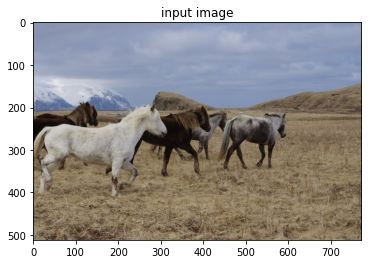

In [8]:
#@title Input Image
image = cv2.imread("data/horses.jpg")
plt_imshow("input image", image)

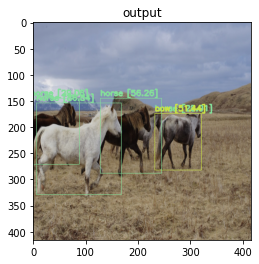

In [9]:
#@title Display output image
image = cv2.imread("output_0.png")
plt_imshow("output", image)

In [10]:
!python darknet_video.py --input guitar.mp4 --weights yolov2-voc.weights --config_file cfg/yolov2-voc.cfg --data_file cfg/voc.data --dont_show --out_filename output.mp4

 Try to load cfg: cfg/yolov2-voc.cfg, weights: yolov2-voc.weights, clear = 0 
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 max                2x 2/ 2    416 x 416 x  32 ->  208 x 208 x  32 0.006 BF
   2 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   3 max                2x 2/ 2    208 x 208 x  64 ->  104 x 104 x  64 0.003 BF
   4 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   5 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   6 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   7 max                2x 2/ 2    104 x 104 x 128 ->   52 x  52 x 128 0.001 BF
   8 conv    256       3

To view the video please download the `output.mp4` file from the left side menu (as displayed in the following image) and play it on your local machine. 

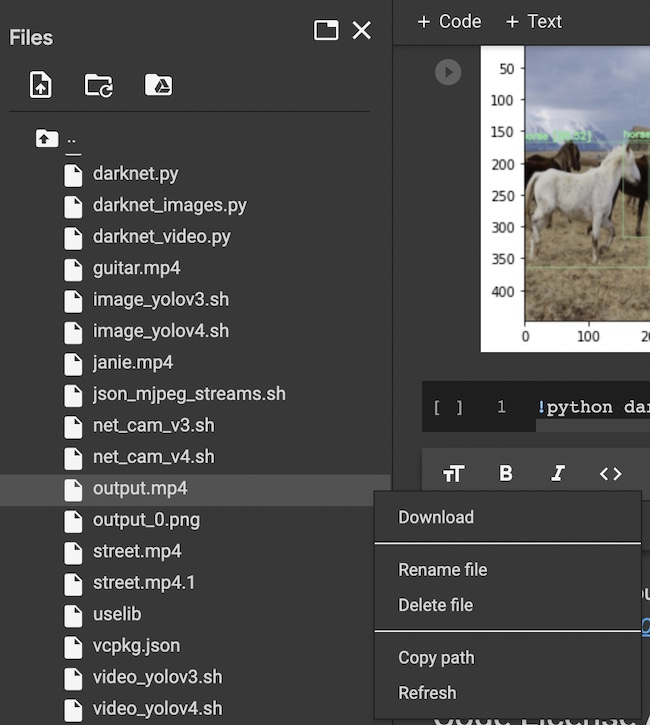

For a detailed walkthrough of the concepts and code, be sure to refer to the full tutorial, [*A Better, Faster, and Stronger Object Detector (YOLOv2)*](https://pyimg.co/ehaox) published on 2022-04-18.